In [1]:
import os
import time 
import uuid 
import cv2 
import urllib
import numpy as np 

In [2]:
IMAGES_PATH = os.path.join('data', 'images')
number_images= 30 

In [14]:
# url = "http://192.168.1.71:8080/shot.jpg"
# while True:
#     imgResp = urllib.request.urlopen(url)
#     imgNp = np.array(bytearray(imgResp.read()),dtype=np.uint8)
#     img = cv2.imdecode(imgNp, -1 ) 
#     cv2.imshow('test',img)
#     cv2.waitKey(10)
#     if ord('q') == cv2.waitKey(10):
#         exit(0)

In [16]:
url = "http://192.168.1.9:8080/shot.jpg"
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    imgResp = urllib.request.urlopen(url)
    imgNp = np.array(bytearray(imgResp.read()),dtype=np.uint8)
    img = cv2.imdecode(imgNp, -1 ) 
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, img)
    cv2.imshow('frame', img)
    time.sleep(0.5)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [ ]:
# cap = cv2.VideoCapture("http://192.168.1.67:8080/shot.jpg")
# if not cap.isOpened():
#     print("error:Couldn't open Video capture.")
# for imgnum in range(number_images):
#     print('Collecting image {}'.format(imgnum))
#     ret, frame = cap.read()
#     if not ret:
#         print("Error:Couldn't read frame.")
#         break
#     imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()


In [18]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: /home/zanam/.labelmerc


In [3]:
import tensorflow as tf 
import json
import numpy as np 
import matplotlib.pyplot as plt 

2023-12-25 12:36:27.303893: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-25 12:36:27.303956: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-25 12:36:27.318164: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-25 12:36:27.353889: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-25 12:36:28.176468: W tensorflow/compiler/tf2

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu,True)

2023-12-25 12:36:32.474460: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-25 12:36:32.552638: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-25 12:36:32.552790: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
images = tf.data.Dataset.list_files('data/images/*.jpg',shuffle = False)

In [ ]:
images.as_numpy_iterator().next()

In [7]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [17]:

type(images)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [18]:
images = images.map(load_image)

In [19]:
images.as_numpy_iterator().next()

array([[[37, 37, 37],
        [38, 38, 38],
        [38, 38, 38],
        ...,
        [22, 56, 40],
        [15, 60, 40],
        [12, 61, 40]],

       [[37, 37, 37],
        [37, 37, 37],
        [38, 38, 38],
        ...,
        [23, 55, 40],
        [17, 58, 40],
        [15, 60, 40]],

       [[36, 36, 36],
        [37, 37, 37],
        [37, 37, 37],
        ...,
        [29, 53, 40],
        [23, 55, 40],
        [22, 56, 40]],

       ...,

       [[16, 12,  9],
        [16, 12,  9],
        [16, 12,  9],
        ...,
        [24, 12, 16],
        [24, 12, 16],
        [24, 12, 16]],

       [[16, 12,  9],
        [16, 12,  9],
        [16, 12,  9],
        ...,
        [24, 12, 16],
        [24, 12, 16],
        [24, 12, 16]],

       [[17, 13, 10],
        [17, 13, 10],
        [17, 13, 10],
        ...,
        [24, 12, 16],
        [24, 12, 16],
        [24, 12, 16]]], dtype=uint8)

In [87]:
type(images)

NameError: name 'images' is not defined

In [30]:
image_generator= images.batch(4).as_numpy_iterator()

In [76]:
plot_images = image_generator.next()


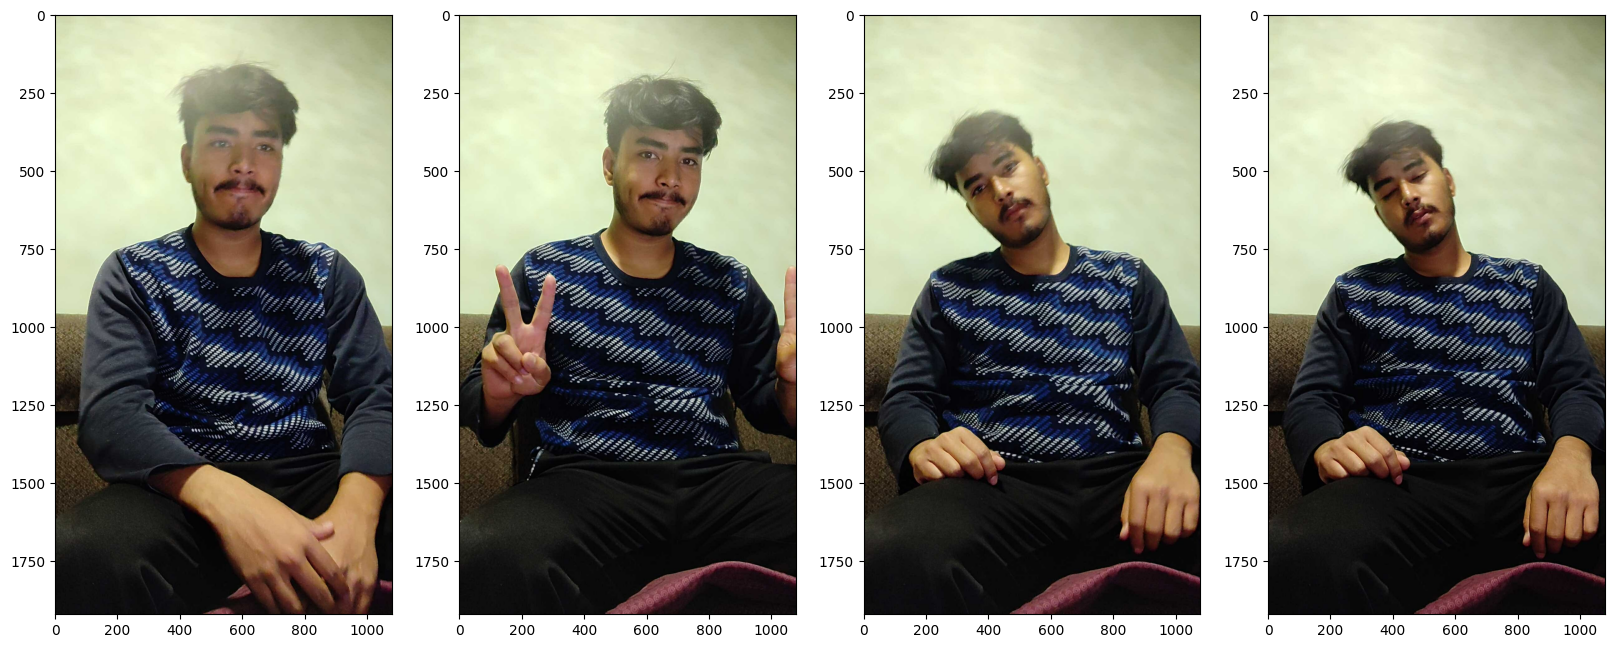

In [77]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()





|
***Moving label datas to their respective folders, ie train->label, test->lable, val->label***

In [8]:
from sklearn.model_selection import train_test_split
import shutil


In [99]:
images_folder = "data/images"
labels_folder = "data/labels"

output_folder = "output"
train_folder = os.path.join(output_folder, "train")
test_folder = os.path.join(output_folder, "test") 
cv_folder = os.path.join(output_folder, "cross_validation")

In [103]:
for folder in [train_folder, test_folder, cv_folder]:
    os.makedirs(folder, exist_ok=True)
    os.makedirs(os.path.join(folder,"labels"), exist_ok=True)
    os.makedirs(os.path.join(folder,"images"), exist_ok=True)

In [106]:
image_files = [file for file in os.listdir(images_folder) if file.endswith(".jpg")]

label_files = [file for file in os.listdir(labels_folder) if file.endswith(".json")]
image_files.sort()
label_files.sort()
print(f"{image_files[:3]}\n {label_files[:3]}")

['5f046bfc-a256-11ee-9804-e00af637fbdf.jpg', '5f5f619c-a256-11ee-9804-e00af637fbdf.jpg', '5fb71c52-a256-11ee-9804-e00af637fbdf.jpg']
 ['5f046bfc-a256-11ee-9804-e00af637fbdf.json', '5f5f619c-a256-11ee-9804-e00af637fbdf.json', '5fb71c52-a256-11ee-9804-e00af637fbdf.json']


In [107]:
image_train, image_test, label_train, label_test = train_test_split(image_files, label_files, test_size=0.2, random_state=42)
image_train, image_cv, label_train, label_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [116]:
print(X_train[:5])
print(y_train[:5])
print(len(X_train))
print(len(y_train))

['e34466f6-a26a-11ee-aaae-e00af637fbdf.jpg', '6654a1d2-a26b-11ee-aaae-e00af637fbdf.jpg', '61cf41f4-a256-11ee-9804-e00af637fbdf.jpg', 'e7eda014-a26a-11ee-aaae-e00af637fbdf.jpg', '63e86d12-a256-11ee-9804-e00af637fbdf.jpg']
['e34466f6-a26a-11ee-aaae-e00af637fbdf.json', '6654a1d2-a26b-11ee-aaae-e00af637fbdf.json', '61cf41f4-a256-11ee-9804-e00af637fbdf.json', 'e7eda014-a26a-11ee-aaae-e00af637fbdf.json', '63e86d12-a256-11ee-9804-e00af637fbdf.json']
76
76


In [117]:
def move_files(src_folder,files, dest_folder): 
    for file in files:
        src_path = os.path.join(src_folder, file)
        dest_path = os.path.join(dest_folder, file) 
        shutil.move(src_path, dest_path)

In [120]:
# move_files(images_folder, X_train, os.path.join(train_folder, "images"))
# move_files(labels_folder, y_train, os.path.join(train_folder, "labels"))


move_files(images_folder, X_test, os.path.join(test_folder, "images"))
move_files(labels_folder, y_test, os.path.join(test_folder, "labels"))

move_files(images_folder, X_cv, os.path.join(cv_folder, "images"))
move_files(labels_folder, y_cv, os.path.join(cv_folder, "labels"))


Applying the Image Augmentation now 

In [9]:
import albumentations as alb

In [10]:
augmentor = alb.Compose([alb.RandomCrop(width=800, height=800), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [104]:
img = cv2.imread(os.path.join('output','train', 'images','e995edd6-a26a-11ee-aaae-e00af637fbdf.jpg'))


In [111]:
x, y = img.shape[0], img.shape[1]

In [112]:
with open(os.path.join('output', 'train', 'labels', 'e995edd6-a26a-11ee-aaae-e00af637fbdf.json'), 'r') as f:
    label = json.load(f)

In [113]:
label['shapes'][0]['points']

[[325.10638297872345, 12.127659574468183],
 [797.4468085106383, 656.8085106382979]]

In [114]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [115]:
coords

[325.10638297872345, 12.127659574468183, 797.4468085106383, 656.8085106382979]

In [116]:
coords = list(np.divide(coords, [y,x,y,x]))

In [117]:
coords

[0.3010244286840032,
 0.006316489361702178,
 0.7383766745468874,
 0.34208776595744683]

In [118]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [119]:
augmented['bboxes']

[(0.1426329787234043, 0.0, 0.733058510638298, 0.7635106382978724)]

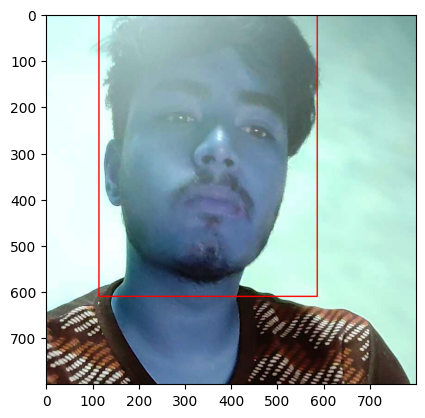

In [120]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [800,800]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [800,800]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [82]:
I_HEIGHT , I_WIDTH = img.shape[0], img.shape[1]
print(I_WIDTH, I_HEIGHT)

1920 1080


In [86]:
for partition in ['train', 'test', 'cross_validation']:
    for image in os.listdir(os.path.join('output', partition, 'images')):
        img = cv2.imread(os.path.join('output', partition , 'images', image))
        
        coords = [0, 0, 0.00001, 0.00001]
        
        label_path = os.path.join('output', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            I_HEIGHT, I_WIDTH = img.shape[0], img.shape[1]#had to do this because I'm a fool, images with 1920x1080 awa 1080x1920
            coords = list(np.divide(coords, [I_WIDTH, I_HEIGHT, I_WIDTH, I_HEIGHT]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image 

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0 
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0 

                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)
        except Exception as e:
            print(e)
            
                

x_max is less than or equal to x_min for bbox [0.6726190476190477, 0.3425925925925925, 0.23065476190476195, 0.8214285714285713, 'face'].
x_max is less than or equal to x_min for bbox [0.699404761904762, 0.0013227513227513379, 0.37500000000000006, 0.31878306878306883, 'face'].
x_max is less than or equal to x_min for bbox [0.6860119047619048, 0.0753968253968254, 0.37500000000000006, 0.6150793650793651, 'face'].
x_max is less than or equal to x_min for bbox [0.6800595238095238, 0.006613756613756584, 0.3720238095238096, 0.26322751322751325, 'face'].
x_max is less than or equal to x_min for bbox [0.8110119047619048, 0.09656084656084661, 0.4761904761904763, 0.6574074074074073, 'face'].


In [11]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg' ,shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (300, 300)))
train_images = train_images.map(lambda x: x / 255)

2023-12-25 12:37:21.663243: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-25 12:37:21.663514: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-25 12:37:21.663713: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [12]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg',shuffle = False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (300, 300)))
test_images = test_images.map(lambda x: x / 255)

In [13]:
val_images = tf.data.Dataset.list_files('aug_data/cross_validation/images/*.jpg',shuffle = False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (300, 300)))
val_images = val_images.map(lambda x: x / 255)

In [14]:
train_images.as_numpy_iterator().next()

array([[[0.5457516 , 0.40337688, 0.21873638],
        [0.5921569 , 0.43202615, 0.23856209],
        [0.6227669 , 0.46198258, 0.2569717 ],
        ...,
        [0.45490196, 0.6       , 0.57254905],
        [0.45490196, 0.6       , 0.57254905],
        [0.45490196, 0.6       , 0.57254905]],

       [[0.56339866, 0.4143791 , 0.23006535],
        [0.595098  , 0.4343137 , 0.24019608],
        [0.6333333 , 0.47254902, 0.26078433],
        ...,
        [0.44509804, 0.6039216 , 0.57254905],
        [0.44509804, 0.6039216 , 0.57254905],
        [0.44509804, 0.6039216 , 0.57254905]],

       [[0.5908497 , 0.4326797 , 0.23442265],
        [0.60490197, 0.4385621 , 0.23986928],
        [0.64052284, 0.47189543, 0.26165578],
        ...,
        [0.4392157 , 0.60784316, 0.57254905],
        [0.4392157 , 0.60784316, 0.57254905],
        [0.4392157 , 0.60784316, 0.57254905]],

       ...,

       [[0.12875833, 0.20326814, 0.11699362],
        [0.12875833, 0.20326814, 0.11699362],
        [0.12875833, 0

In [15]:
def load_labels(label_path): 
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
    return [label['class']], label['bbox']

In [16]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False) 
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [17]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False) 
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [18]:
val_labels = tf.data.Dataset.list_files('aug_data/cross_validation/labels/*.json', shuffle=False) 
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [19]:
val_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.004547, 0.09357 , 0.547   , 0.8384  ], dtype=float16))

In [20]:
len(train_images), len(train_labels) ,len(test_images), len(test_labels), len(val_images), len(val_labels)

(4440, 4440, 1320, 1320, 1140, 1140)

In [21]:
train = tf.data.Dataset.zip((train_images, train_labels)) 
train = train.shuffle(5000) 
train = train.batch(8) 
train = train.prefetch(4)

In [22]:
test = tf.data.Dataset.zip((test_images, test_labels)) 
test = test.shuffle(1500) 
test = test.batch(8) 
test = test.prefetch(4)

In [23]:
val = tf.data.Dataset.zip((val_images, val_labels)) 
val = val.shuffle(1300) 
val = val.batch(8) 
val = val.prefetch(4)

In [24]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0]], dtype=uint8),
 array([[0.5947 , 0.49   , 1.     , 0.9424 ],
        [0.1545 , 0.     , 0.963  , 0.5513 ],
        [0.0657 , 0.492  , 0.747  , 1.     ],
        [0.03778, 0.2406 , 0.8037 , 1.     ],
        [0.2325 , 0.3499 , 1.     , 1.     ],
        [0.01364, 0.     , 0.6147 , 0.466  ],
        [0.06506, 0.3264 , 0.6367 , 0.9487 ],
        [0.     , 0.     , 0.     , 0.     ]], dtype=float16))

In [25]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


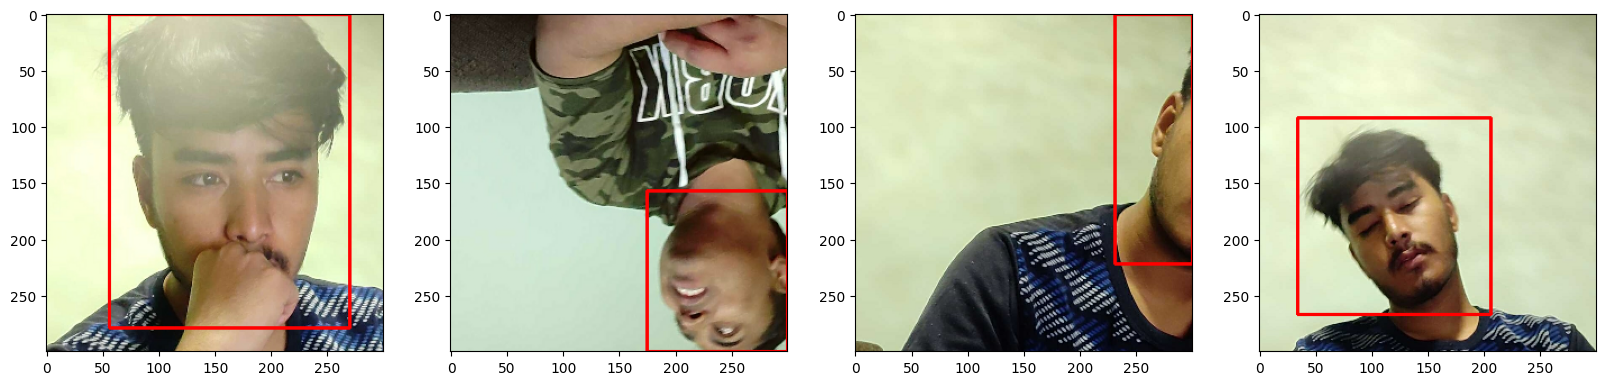

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [300,300]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [300,300]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

Training the Model

In [28]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [29]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 11s 0us/step


In [30]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [31]:
def build_model(): 
    input_layer = Input(shape=(300,300,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [32]:
face_tracker = build_model()

In [34]:
face_tracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [46]:
X, y = train.as_numpy_iterator().next()

In [47]:
X.shape

(8, 300, 300, 3)

In [51]:
classes , coords = face_tracker.predict(X)

1/1 [==============================] - 0s 25ms/step


In [52]:
classes, coords

(array([[0.54367375],
        [0.7527451 ],
        [0.63137156],
        [0.5394912 ],
        [0.60724556],
        [0.5552179 ],
        [0.6247816 ],
        [0.66466486]], dtype=float32),
 array([[0.70744455, 0.33054662, 0.58554757, 0.7612063 ],
        [0.6115902 , 0.36535922, 0.42800942, 0.7545673 ],
        [0.6243922 , 0.33548468, 0.50881827, 0.69175833],
        [0.6931775 , 0.34351653, 0.41422704, 0.7971573 ],
        [0.67238456, 0.41007805, 0.35925794, 0.7125663 ],
        [0.69426036, 0.41644576, 0.5189471 , 0.77561873],
        [0.6349961 , 0.3443431 , 0.46362832, 0.7869928 ],
        [0.6634116 , 0.3000393 , 0.48391172, 0.76679105]], dtype=float32))

Defining Our Losses

In [40]:
batches_per_epoch = len(train)
lr_decay = (1.0 / 0.75 - 1) / batches_per_epoch

In [42]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate = 0.0001, decay=lr_decay) 


In [43]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [44]:
classification_loss = tf.keras.losses.BinaryCrossentropy()
regress_loss = localization_loss

In [54]:
localization_loss(y[1], coords).numpy()#haven't trained the network yet

6.8497896

In [55]:
classification_loss(y[0], classes) 

<tf.Tensor: shape=(), dtype=float32, numpy=0.4920581>

In [57]:
regress_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.8497896>

In [ ]:
#training pipeline

class FaceTracker(Model): 
    def __init__(self, facetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)
